In [15]:
import pickle
from sklearn import linear_model
import pandas as pd

In [16]:
# get the pre-processed data.
with open('data_processed', 'rb') as f:
    data = pickle.load(f)
data.head()

,AGE,SEX,ASSO MEDICAL PROB,H/O INJURY/SURGERY,DRUG HISTORY,FREQUENCY,avg
0,29,0,0,0,0,"115, 115, 113",114.30
1,36,1,0,0,0,"95,94,96",94.00
2,37,0,0,0,0,"80,82,81",81.00
3,37,1,0,0,0,"100, 101, 100",100.33
4,38,1,0,0,0,9.91001e+07,99.80


In [17]:
# divide data into testing and training models
from sklearn import cross_validation
X = data.drop(['FREQUENCY'], axis=1)
Y= data['avg']

# drop the avg from training model
X.drop('avg', axis=1, inplace=True)

X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X,Y)
X_train.shape

(37, 5)

In [18]:
# importing and creating our regression model
regression = linear_model.LinearRegression()
# training our mdoel
regression.fit(X_train, Y_train)
# calculating our acccuracy on test data
accuracy = regression.score(X_test,Y_test)

print(accuracy)

0.839370692728


In [19]:
print(regression.coef_)

[-0.995998   -2.4051819   1.43219104 -1.79810437  4.56147567]


In [21]:
regression.predict([[75,1,0,0,0]])

array([ 57.63830934])

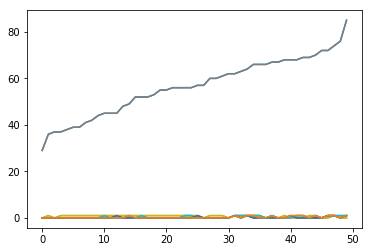

In [24]:
from matplotlib import pyplot
pyplot.plot(X)
pyplot.show()